In [1]:
import pandas as pd
from pandas import Series,DataFrame

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##For this churn problem - the data is being loaded from https://www.kaggle.com/blastchar/telco-customer-churn

file = './WA_Fn-UseC_-Telco-Customer-Churn.csv'

data = pd.read_csv(file)

In [5]:
data.shape

(7043, 21)

In [105]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [33]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
#target is the churn column. 

#Lets see distribution of the target to know if the data is not skewed
target_dist = data['Churn'].value_counts()

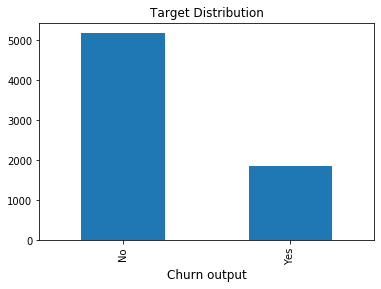

In [31]:
target_dist.plot(kind='bar', title='Target Distribution')
plt.title('Target Distribution')
plt.xlabel('Churn output', fontsize=12)
plt.show()

In [93]:
#setting churn as 1 or 0 for Yes or No respectively
data['Churn'] = np.where(data['Churn']=='Yes',1,0)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(3), obje

In [125]:
data.rename(columns={'customerID':'ID','gender':'Gender','SeniorCitizen':'Senior','tenure':'Tenure'},inplace=True)

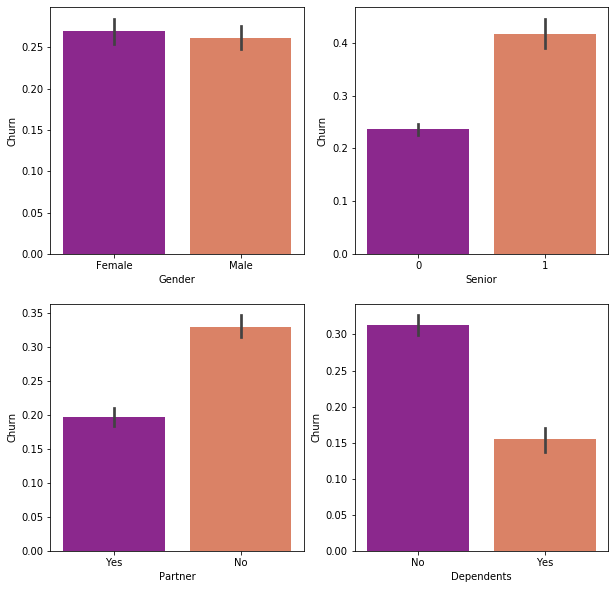

In [199]:
fig, ax = plt.subplots(2,2, figsize=(10,10))


for axes,x in zip(ax.flatten(),['Gender','Senior','Partner','Dependents']):
    sns.barplot(x=x, y='Churn',data=data,ax=axes,palette='plasma')
    #axes.title('{} vs Churn'.format(x))

#ax[0,1].xticks([0,1],['Senior','Non-Senior']) 
plt.show()

Ratio of churn is not significantly different for gender. 

Customers who does not have partner or dependants have a higher possibility of churning. They may be only having mobile connections and are ok to change it - attracted to better discounts,offers or better data plans.

Customers with partners and dependents doesnt prefer to change. This could be to avoid changing numbers often as this could be majorly working class. 

Churn ratio is higher for senior citizens - this could be to save money, or not being internet savy.

In [158]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [161]:
data['Tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

In [194]:
pd.DataFrame(data[['Tenure','Churn']].groupby('Churn').mean())

,Tenure
Churn,
0,37.569965
1,17.979133


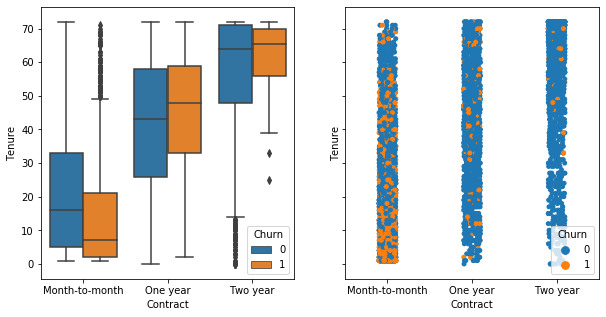

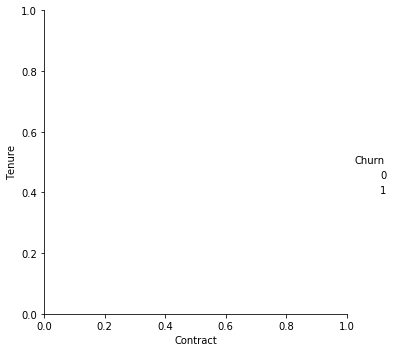

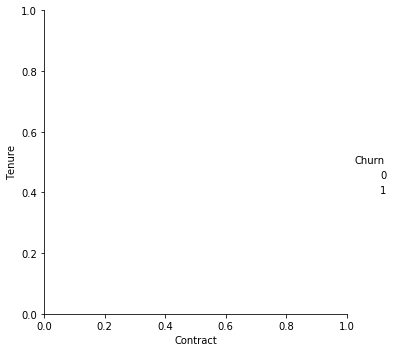

In [213]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5), sharey = True)

sns.catplot(x='Contract',y='Tenure',hue='Churn',data=data,kind='box', ax=ax1)
contract_types = data['Contract'].astype('category').cat.categories.tolist()
#plt.xticks(ticks = contract_types, labels=['Monthly','One Year','Two year'])

sns.catplot(x='Contract',y='Tenure',hue='Churn',data=data,kind='strip', ax=ax2)
plt.show()

On average customers who stay for more than 17 months tend to continue the business. 

